In [57]:
import json
import requests
import socket

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
# 以降でデータフレームを表示する際の最大表示列数を指定
pd.set_option('display.max_columns', 100)

In [59]:
# http://docs.learninglocker.net/http-aggregation/
url = 'http://{}:8080/statements/aggregate?cache=false&maxTimeMS=5000&maxScan=10000&pipeline=%5B%7B%22%24limit%22%3A%203000%7D%2C%20%7B%22%24project%22%3A%20%7B%20%22statement%22%3A%201%2C%20%22_id%22%3A%200%20%7D%7D%5D'.format(socket.gethostbyname('learninglocker'))
# Learning Lockerのクライアント情報を設定
user = '2b15bab38dcf7f81b6e6db54849d01b6208b4f1d'
passwd = 'dd9b4af4520a82a6c9cb66f241aafd12f24427a1'

In [60]:
# Learning LockerのAGGREGATION APIでxAPIステートメントを取得
r = requests.get(url, auth=(user, passwd))
# Jsonを辞書型に変換
response_data = json.loads(r.text)
response_data

[{'statement': {'actor': {'objectType': 'Agent',
    'name': '',
    'account': {'name': '2', 'homePage': 'http://localhost:8000'}},
   'verb': {'id': 'urn:x-moodle-event-action:loggedin',
    'display': {'en': 'loggedin'}},
   'context': {'contextActivities': {'category': [{'objectType': 'Activity',
       'id': 'http://moodle.org',
       'definition': {'type': 'http://id.tincanapi.com/activitytype/source',
        'name': {'en': 'Moodle'},
        'description': {'en': 'Moodle is a open source learning platform designed to provide educators, administrators and learners with a single robust, secure and integrated system to create personalized learning environments.'}}}]},
    'platform': 'Moodle',
    'language': 'en'},
   'object': {'definition': {'name': {'en': 'user_loggedin'},
     'description': {'en': 'user_loggedin'}},
    'id': 'http://localhost:8000',
    'objectType': 'Activity'},
   'timestamp': '2019-06-20T14:38:01+09:00',
   'id': 'f7c676e2-b435-467a-9372-47162dbfd669',


In [61]:
# 辞書からステートメントのみを抽出
stats = [d['statement'] for d in response_data]

In [62]:
# ネスト項目をフラットにしてpandasのDataFrameを作成
df = pd.io.json.json_normalize(stats)
# 先頭5件のみ確認
df.head()

,actor.account.homePage,actor.account.name,actor.name,actor.objectType,authority.mbox,authority.name,authority.objectType,context.contextActivities.category,context.language,context.platform,id,object.definition.description.en,object.definition.name.en,object.definition.type,object.id,object.objectType,stored,timestamp,verb.display.en,verb.id,version
0,http://localhost:8000,2,,Agent,mailto:hello@learninglocker.net,New Client,Agent,"[{'objectType': 'Activity', 'id': 'http://mood...",en,Moodle,f7c676e2-b435-467a-9372-47162dbfd669,user_loggedin,user_loggedin,NaN,http://localhost:8000,Activity,2019-07-02T07:38:37.796Z,2019-06-20T14:38:01+09:00,loggedin,urn:x-moodle-event-action:loggedin,1.0.0
1,http://localhost:8000,2,,Agent,mailto:hello@learninglocker.net,New Client,Agent,"[{'objectType': 'Activity', 'id': 'http://mood...",en,Moodle,630161eb-2ee9-46e5-9e8e-4156466e062c,user_password_updated,user_password_updated,NaN,http://localhost:8000/user/profile.php?id=null,Activity,2019-07-02T07:38:37.796Z,2019-06-20T14:39:36+09:00,updated,urn:x-moodle-event-action:updated,1.0.0
2,http://localhost:8000,2,,Agent,mailto:hello@learninglocker.net,New Client,Agent,"[{'objectType': 'Activity', 'id': 'http://mood...",en,Moodle,e3159942-b0ec-49a8-a0c3-55d854c08fcf,user_updated,user_updated,NaN,http://localhost:8000/user/editadvanced.php?id...,Activity,2019-07-02T07:38:37.796Z,2019-06-20T14:39:37+09:00,updated,urn:x-moodle-event-action:updated,1.0.0
3,http://localhost:8000,2,,Agent,mailto:hello@learninglocker.net,New Client,Agent,"[{'objectType': 'Activity', 'id': 'http://mood...",en,Moodle,dce27a75-7789-4dbd-914a-664748cd2462,dashboard_viewed,dashboard_viewed,NaN,http://localhost:8000,Activity,2019-07-02T07:38:48.215Z,2019-06-20T14:41:31+09:00,viewed,urn:x-moodle-event-action:viewed,1.0.0
4,http://localhost:8000,0,,Agent,mailto:hello@learninglocker.net,New Client,Agent,"[{'objectType': 'Activity', 'id': 'http://mood...",en,Moodle,0f7aea09-49e9-4cb6-9a08-e9e9d61d4c5d,course_viewed,course_viewed,http://adlnet.gov/expapi/activities/module,http://localhost:8000/course/view.php?id=1,Activity,2019-07-02T07:38:48.215Z,2019-07-02T16:32:33+09:00,viewed,urn:x-moodle-event-action:viewed,1.0.0


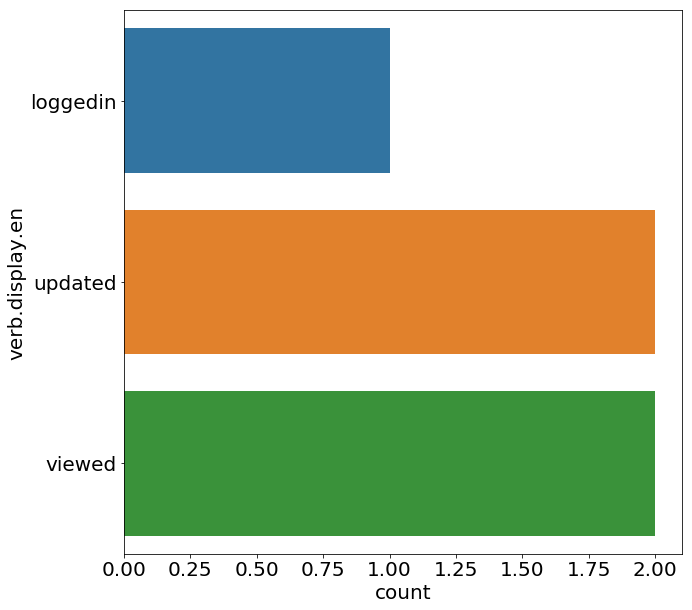

In [63]:
# イベントの件数を集計
plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 20
sns.countplot(y='verb.display.en', data=df)